# Desafío inventures 

*Realizado por Pablo Cortés Cataldo.*

In [1]:
# Librerías usadas
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from datetime import datetime

Se cargan los datos.

In [101]:
nombre = 'vehicle_gps.csv'
df = pd.read_csv(nombre)
df

,vehicle,latitude,longitude,timestamp
0,A,-33.416709,-70.592693,01-01-2022 8:01
1,A,-33.417425,-70.592487,01-01-2022 8:02
2,A,-33.417831,-70.592367,01-01-2022 8:04
3,A,-33.417879,-70.592018,01-01-2022 8:05
4,A,-33.417818,-70.591653,01-01-2022 8:06
...,...,...,...,...
72,D,-33.419257,-70.586876,01-01-2022 8:22
73,D,-33.418902,-70.587003,01-01-2022 8:23
74,D,-33.418350,-70.587149,01-01-2022 8:23
75,D,-33.417943,-70.587252,01-01-2022 8:24


Existen algunos nodos duplicados por la ubicación.

In [102]:
duplicados_mask = df.duplicated(subset=['latitude', 'longitude'], keep=False)
duplicados_index = df[duplicados_mask].index
print(duplicados_index)

Index([37, 43, 44, 54], dtype='int64')


Se genera una nueva columna **nodo_id** en base al indice del dataframe.

In [103]:
df['nodo_id'] = df.index

Se cambia el tipo de datos de la columna **timestamp** al tipo datetime.

In [104]:
df['timestamp'] = pd.to_datetime(df['timestamp'], format='%d-%m-%Y %H:%M')

Luego el dataframe se agrupa por la columna **vehicle** para asi determinar el tiempo entre nodos, el cual se agrega a una nueva columna **tiempo**.

In [105]:
grupos = df.groupby('vehicle')

for nombre_grupo, grupo in grupos:
    grupo['tiempo'] = grupo['timestamp'].diff().apply(lambda x: x.seconds // 60)
    df.loc[grupo.index, 'tiempo'] = grupo['tiempo']
    
df

,vehicle,latitude,longitude,timestamp,nodo_id,tiempo
0,A,-33.416709,-70.592693,2022-01-01 08:01:00,0,NaN
1,A,-33.417425,-70.592487,2022-01-01 08:02:00,1,1.0
2,A,-33.417831,-70.592367,2022-01-01 08:04:00,2,2.0
3,A,-33.417879,-70.592018,2022-01-01 08:05:00,3,1.0
4,A,-33.417818,-70.591653,2022-01-01 08:06:00,4,1.0
...,...,...,...,...,...,...
72,D,-33.419257,-70.586876,2022-01-01 08:22:00,72,1.0
73,D,-33.418902,-70.587003,2022-01-01 08:23:00,73,1.0
74,D,-33.418350,-70.587149,2022-01-01 08:23:00,74,0.0
75,D,-33.417943,-70.587252,2022-01-01 08:24:00,75,1.0


Se define el grafo G con los nodos originales.

In [106]:
G = nx.Graph()

Se itera en las filas del dataframe para agregar cada nodo al grafo G.

In [107]:
for index, fila in df.iterrows():
    lat = float(fila['latitude'])
    lon = float(fila['longitude'])
    pos = (lat, lon)
    nodo_id = fila['nodo_id']
    vehicle = fila['vehicle']
    G.add_node(nodo_id, pos=pos, vehicle=vehicle)
        
print(nx.info(G))

Graph with 77 nodes and 0 edges


Lista de id de los nodos por vehiculo.

In [108]:
na = [a for a in df.loc[df['vehicle'] == 'A', 'nodo_id']]
nb = [b for b in df.loc[df['vehicle'] == 'B', 'nodo_id']]
nc = [c for c in df.loc[df['vehicle'] == 'C', 'nodo_id']]
nd = [d for d in df.loc[df['vehicle'] == 'D', 'nodo_id']]

Se agregan los arcos al grafo G.

In [109]:
n_a = len(df.loc[df['vehicle'] == 'A'])#17 0 a 16
n_b = len(df.loc[df['vehicle'] == 'B'])#21 17 a 37
n_c = len(df.loc[df['vehicle'] == 'C'])#17 38 a 54
n_d = len(df.loc[df['vehicle'] == 'D'])#22 55 a 76

for index, fila in df.iterrows():
    if index < n_a - 1:
        nodo_id = fila['nodo_id']        
        nodo_sig = df.iloc[index+1]
        nodo_id_sig = nodo_sig['nodo_id']
        tiempo = nodo_sig['tiempo']
        
        # agregar arco al grafo
        G.add_edge(nodo_id, nodo_id_sig, weight=tiempo)
    
    elif index >= n_a and index < n_a + n_b - 1:
        nodo_id = fila['nodo_id']        
        nodo_sig = df.iloc[index+1]
        nodo_id_sig = nodo_sig['nodo_id']
        tiempo = nodo_sig['tiempo']
        
        # agregar arco al grafo
        G.add_edge(nodo_id, nodo_id_sig, weight=tiempo)
    
    elif index >= n_a + n_b and index < n_a + n_b + n_c - 1:
        nodo_id = fila['nodo_id']        
        nodo_sig = df.iloc[index+1]
        nodo_id_sig = nodo_sig['nodo_id']
        tiempo = nodo_sig['tiempo']
        
        # agregar arco al grafo
        G.add_edge(nodo_id, nodo_id_sig, weight=tiempo)
    
    elif index >= n_a + n_b + n_c and index < n_a + n_b + n_c + n_d - 1:
        nodo_id = fila['nodo_id']        
        nodo_sig = df.iloc[index+1]
        nodo_id_sig = nodo_sig['nodo_id']
        tiempo = nodo_sig['tiempo']
        
        # agregar arco al grafo
        G.add_edge(nodo_id, nodo_id_sig, weight=tiempo)
        
# información del grafo
print(nx.info(G))

Graph with 77 nodes and 73 edges


Se ha generado un grafo para mejorar su visualización, lo que permite observar claramente la presencia de nodos que se conectan entre sí. Se puede inferir que los vehículos en algunos tramos siguieron la misma ruta. Para facilitar la identificación de los arcos que unen cada nodo, se decidió aplicar una simplificación del grafo mediante el algoritmo KMeans. Esta técnica también es útil ya que algunos de los nodos están muy cerca y, en algunos casos, se superponen, como ocurre con los pares (37,54) y (43,44).

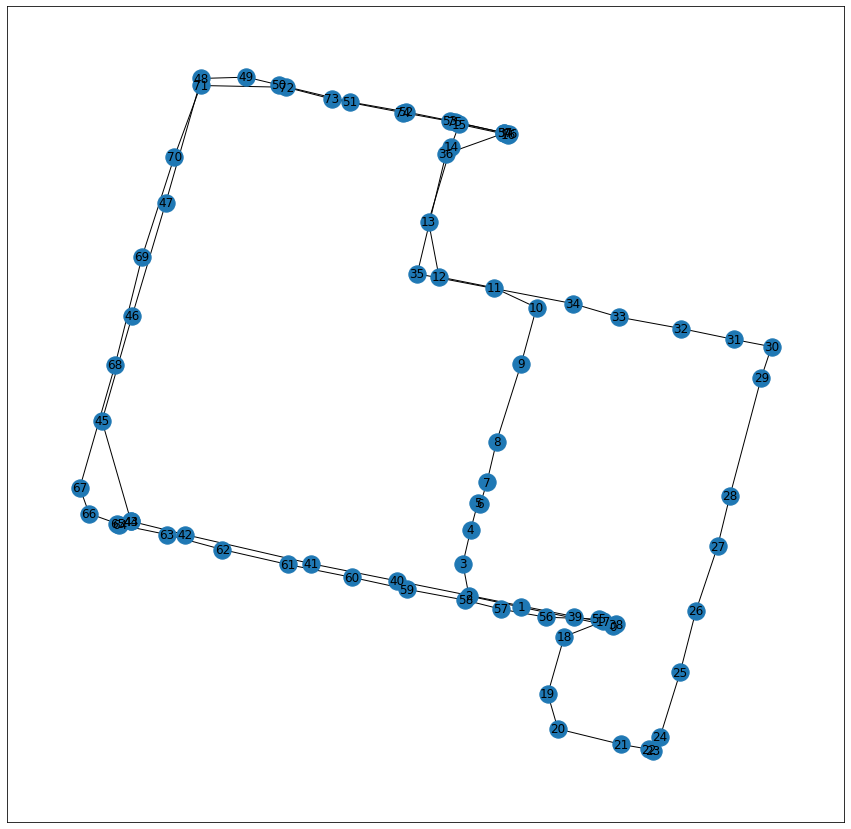

In [110]:
pos = {node: (data['pos'][0], data['pos'][1]) for node, data in G.nodes(data=True)}
fig = plt.figure(figsize=(15, 15))
nx.draw_networkx(G, pos=pos, with_labels=True)
plt.show()

Se aplica el algoritmo KMeans solo para las columnas **latitude** y **longitude**.

La cantidad de cluster se escoge mirando el grafo original, en donde se estima que hay una cantidad bastante alta de nodos cercanos o superpuestos.

In [117]:
X = df[['latitude', 'longitude']].values
kmeans = KMeans(n_clusters=35, random_state=42)
kmeans.fit(X)
centroids = kmeans.cluster_centers_
labels = kmeans.labels_

Luego se genera un nuevo grafo simplificado llamado Gs y se agregan los nuevos nodos que vendrían a ser los centroides de cada uno de los clusters identificados.

In [118]:
Gs = nx.Graph()
for i, centroid in enumerate(centroids):
    Gs.add_node(i, pos=(centroid[0], centroid[1]))

Nuevamente se agregan los arcos pero al grafo simplificado de la siguiente manera:

- Primero se determina la distancia de manhattan entre cada centroide y los nodos que conforman cada arco del grafo original G.
- Luego se determina el centroide más cercano a cada uno de estos nodos extremos.
- Para evitar bucles innecesarios en el mismo nodo simplificado, se escoge el segundo menor si es que el centroide mas cercano a cada uno de los nodos de un arco corresponde al mismo.
- Entonces se define el arco como con aquellos centroides que tienen la menor distancia a los nodos originales.
- Luego se almacenan los pesos de los arcos originales para determinar el peso promedio, que en este caso serian los tiempos promedios de los arcos consolidados entre los nodos simplificados o agrupados. (Los nodos se guardan como pares no ordenados, por eso se debe comprobar el orden invertido)

In [119]:
for edge in G.edges():
# Se determina la distancia de Manhattan 
    dists0 = np.abs(X[edge[0]] - centroids)
    dists1 = np.abs(X[edge[1]] - centroids)

# Se determina el centroide mas cercano a los dos nodos del borde del arco
    centroid_idx0 = np.argmin(dists0.sum(axis=1))
    centroid_idx1 = np.argmin(dists1.sum(axis=1))

# Si el centroide es el mismo, se ocupa el segundo menor
    if centroid_idx0 == centroid_idx1:
        dists1_ordenadas = np.argsort(dists1.sum(axis=1))
        centroid_idx1 = dists1_ordenadas[1]
        
# Se define el arco del grafo simplificado    
    Gs_edge = (centroid_idx0, centroid_idx1)

# Se agregan los arcos al nodo simplificado
    if Gs_edge not in Gs.edges():
        Gs.add_edge(*Gs_edge, weight=0)
        
# obtener los pesos de los arcos correspondientes al grafo original
    original_weights = []
    for node1, node2, data in G.edges(data=True):
        if node1 == edge[0] and node2 == edge[1]:
            original_weights.append(data['weight'])
        elif node1 == edge[1] and node2 == edge[0]:
            original_weights.append(data['weight'])

# Consolidar los pesos del arco del grafo simplificado mediante
# promedio de los pesos del grafo original
    if original_weights:
        Gs.edges[Gs_edge]['weight'] += sum(original_weights) / len(original_weights)
    else:
        Gs.edges[Gs_edge]['weight'] += 0

Se genera el grafo simplificado.

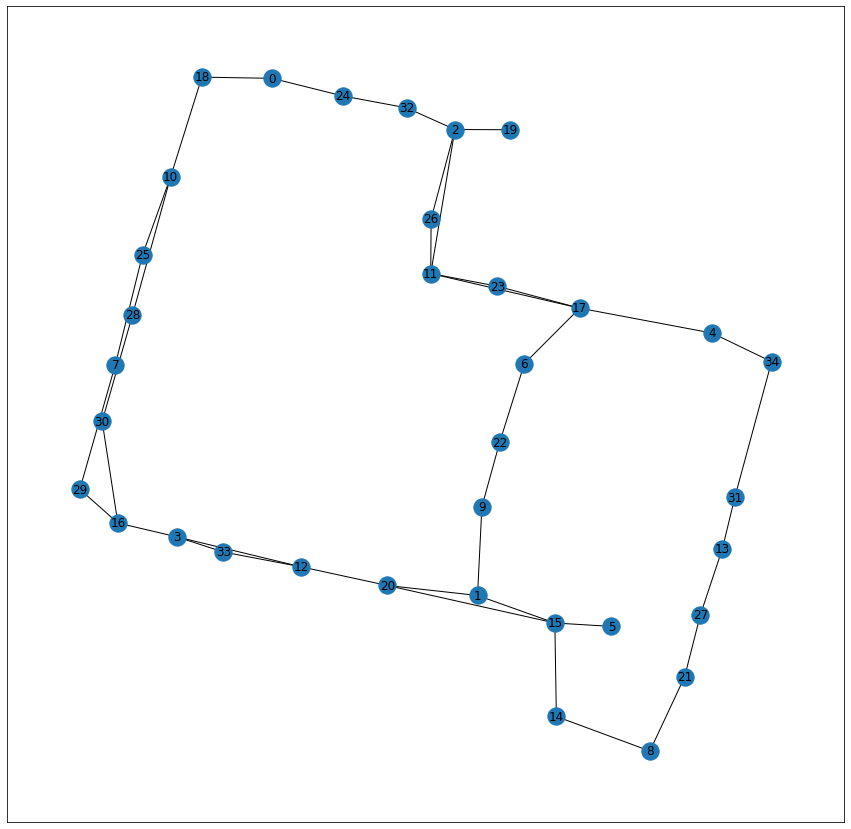

In [120]:
pos = {node: (data['pos'][0], data['pos'][1]) for node, data in Gs.nodes(data=True)}
fig = plt.figure(figsize=(15, 15))
nx.draw_networkx(Gs, pos=pos, with_labels=True)
plt.show()

Se define una función que determina el tiempo entre nodos mediante el algoritmo dijkstra, el cual determina que ruta es la mas corta entre dos nodos.

In [121]:
def tiempo_entre_nodos(origen, destino):
    ruta = nx.dijkstra_path(Gs, origen, destino, weight='tiempo')
    tiempo = nx.dijkstra_path_length(Gs, origen, destino, weight='tiempo')
    ruta_nodos = [(ruta[i], ruta[i+1]) for i in range(len(ruta)-1)]
    return {'tiempo': tiempo, 'ruta_nodos': ruta_nodos}

In [122]:
tiempo_entre_nodos(11,9)

{'tiempo': 4, 'ruta_nodos': [(11, 17), (17, 6), (6, 22), (22, 9)]}